In [20]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [52]:
%%time 
import _pickle, gzip, urllib.request, json
import numpy as np


with gzip.open('soundee.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = _pickle.load(f, encoding='latin1')
print(train_set[0].shape)

(2758, 32, 32, 3)
CPU times: user 118 ms, sys: 16.2 ms, total: 134 ms
Wall time: 134 ms


This is a drop


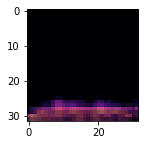

This is a drop


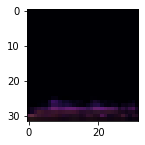

This is a drop


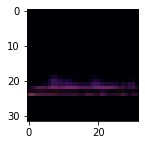

This is a drop


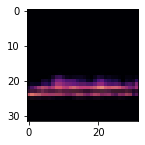

This is a drop


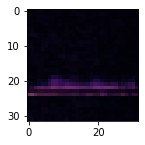

This is a drop


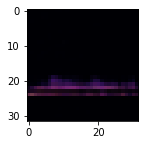

This is a drop


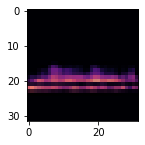

This is a drop


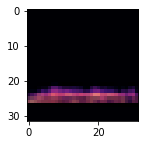

This is a drop


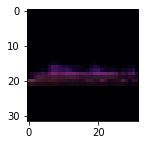

This is a drop


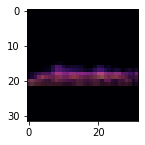

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2,10)

for i in range(0, 10):
    img = train_set[0][i]
    label = train_set[1][i]
    img_reshape = img.reshape((32,32,3))
    imgplot = plt.imshow(img_reshape)
    print('This is a {}'.format(label))
    plt.show()

In [53]:
(train_images, train_labels), (valid_images, valid_labels), (test_images, test_labels) = train_set, valid_set, test_set

In [12]:
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)

train_images shape (2758, 32, 32, 3)
train_labels shape (2758,)


In [64]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
valid_images = valid_images.reshape(valid_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

train_images = train_images.astype('float32')
valid_images = valid_images.astype('float32')
test_images = test_images.astype('float32')

In [65]:
# normalizing the data to help with the training
train_images /= 255
valid_images /= 255
test_images /= 255

In [66]:
from sklearn.preprocessing import LabelEncoder

def encoding_to_int(labels):
    e = LabelEncoder()
    e.fit(labels)
    return e.transform(labels)

In [67]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", train_labels.shape)
train_labels = np_utils.to_categorical(encoding_to_int(train_labels), n_classes)
valid_labels = np_utils.to_categorical(encoding_to_int(valid_labels), n_classes)
test_labels = np_utils.to_categorical(encoding_to_int(test_labels), n_classes)
print("Shape after one-hot encoding: ", train_labels.shape)

Shape before one-hot encoding:  (2758,)
Shape after one-hot encoding:  (2758, 3)


In [23]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

In [24]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
# training the model for 10 epochs
model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
44/44 [==============================] - 8s 174ms/step - loss: 0.8830 - accuracy: 0.5442 - val_loss: 0.9580 - val_accuracy: 0.4799
Epoch 2/10
44/44 [==============================] - 8s 172ms/step - loss: 0.7688 - accuracy: 0.6186 - val_loss: 0.9661 - val_accuracy: 0.4680
Epoch 3/10
44/44 [==============================] - 8s 181ms/step - loss: 0.7452 - accuracy: 0.6345 - val_loss: 1.0637 - val_accuracy: 0.4976
Epoch 4/10
44/44 [==============================] - 8s 183ms/step - loss: 0.7400 - accuracy: 0.6287 - val_loss: 1.0641 - val_accuracy: 0.4964
Epoch 5/10
44/44 [==============================] - 9s 193ms/step - loss: 0.7012 - accuracy: 0.6559 - val_loss: 1.1617 - val_accuracy: 0.4893
Epoch 6/10
44/44 [==============================] - 9s 196ms/step - loss: 0.6853 - accuracy: 0.6472 - val_loss: 1.1248 - val_accuracy: 0.4905
Epoch 7/10
44/44 [==============================] - 9s 208ms/step - loss: 0.6778 - accuracy: 0.6436 - val_loss: 1.0781 - val_accuracy: 0.4858
Epoch 

In [68]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

14/14 - 0s - loss: 3.0253 - accuracy: 0.3333

테스트 정확도: 0.3333333432674408


In [28]:
prediction = model.predict(test_images)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [58]:
np.argmax(prediction[407])

2

In [59]:
test_labels[407]

'water'

In [56]:
for index, label in enumerate(test_labels):
    print(index, label)

0 drop
1 drop
2 drop
3 drop
4 drop
5 drop
6 drop
7 drop
8 drop
9 drop
10 drop
11 drop
12 drop
13 drop
14 drop
15 drop
16 drop
17 drop
18 drop
19 drop
20 drop
21 drop
22 drop
23 drop
24 drop
25 drop
26 drop
27 drop
28 drop
29 drop
30 drop
31 drop
32 drop
33 drop
34 drop
35 drop
36 drop
37 drop
38 drop
39 drop
40 drop
41 drop
42 drop
43 drop
44 drop
45 drop
46 drop
47 drop
48 drop
49 drop
50 drop
51 drop
52 drop
53 drop
54 drop
55 drop
56 drop
57 drop
58 drop
59 drop
60 drop
61 drop
62 drop
63 drop
64 drop
65 drop
66 drop
67 drop
68 drop
69 drop
70 drop
71 drop
72 drop
73 drop
74 drop
75 drop
76 drop
77 drop
78 drop
79 drop
80 drop
81 drop
82 drop
83 drop
84 drop
85 drop
86 drop
87 drop
88 drop
89 drop
90 drop
91 drop
92 drop
93 drop
94 drop
95 drop
96 drop
97 drop
98 drop
99 drop
100 drop
101 drop
102 drop
103 drop
104 drop
105 drop
106 drop
107 drop
108 drop
109 drop
110 drop
111 drop
112 drop
113 drop
114 drop
115 drop
116 drop
117 drop
118 drop
119 drop
120 drop
121 drop
122 drop
123

In [62]:
cnt = 0
for i in prediction:
    pre_ans = i.argmax()
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "drop"
    elif pre_ans == 1: pre_ans_str = "motor"
    elif pre_ans == 2: pre_ans_str = "water"
    

    if i[0] >= 0.4 : print(f"{test_labels[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[1] >= 0.4: print(f"{test_labels[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[2] >= 0.4: print(f"{test_labels[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[0] < 0.4 and i[1] < 0.4 and i[2] < 0.4 : print(f"{test_labels[i]} 이미지를 추정할 수 없습니다.")
    print()
    cnt += 1

[0.758 0.240 0.002]
drop 이미지는 drop로 추정됩니다.

[0.742 0.258 0.000]
drop 이미지는 drop로 추정됩니다.

[0.021 0.394 0.585]
drop 이미지는 water로 추정됩니다.

[0.802 0.198 0.000]
drop 이미지는 drop로 추정됩니다.

[0.824 0.176 0.000]
drop 이미지는 drop로 추정됩니다.

[0.007 0.443 0.550]
drop 이미지는 water로 추정됩니다.
drop 이미지는 water로 추정됩니다.

[0.582 0.415 0.003]
drop 이미지는 drop로 추정됩니다.
drop 이미지는 drop로 추정됩니다.

[0.344 0.636 0.020]
drop 이미지는 motor로 추정됩니다.

[0.498 0.495 0.007]
drop 이미지는 drop로 추정됩니다.
drop 이미지는 drop로 추정됩니다.

[0.003 0.296 0.701]
drop 이미지는 water로 추정됩니다.

[0.678 0.320 0.002]
drop 이미지는 drop로 추정됩니다.

[0.034 0.380 0.587]
drop 이미지는 water로 추정됩니다.

[0.046 0.393 0.561]
drop 이미지는 water로 추정됩니다.

[0.044 0.347 0.609]
drop 이미지는 water로 추정됩니다.

[0.001 0.328 0.671]
drop 이미지는 water로 추정됩니다.

[0.595 0.401 0.005]
drop 이미지는 drop로 추정됩니다.
drop 이미지는 drop로 추정됩니다.

[0.665 0.335 0.001]
drop 이미지는 drop로 추정됩니다.

[0.495 0.496 0.009]
drop 이미지는 motor로 추정됩니다.
drop 이미지는 motor로 추정됩니다.

[0.554 0.445 0.002]
drop 이미지는 drop로 추정됩니다.
drop 이미지는 drop로 추정됩니다.

[0.045 0.391 0.

IndexError: arrays used as indices must be of integer (or boolean) type